In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Settings:
pd.set_option('display.width', 190)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('max_colwidth', 200)
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('default')
np.set_printoptions(threshold = 30, edgeitems = 30, precision = 2, suppress = False)


In [3]:
# Read the data and do a little bit of wrangling:
df = pd.read_csv("BCI-values.csv")
target = pd.read_csv("USRECD.csv")
target = target.rename({"DATE": "Date"}, axis=1)
df.Date = pd.to_datetime(df.Date)
target.Date = pd.to_datetime(target.Date)
df = pd.merge(df, target, on="Date")
df = df.sort_values(ascending=True, by="Date")
df = df.set_index("Date")


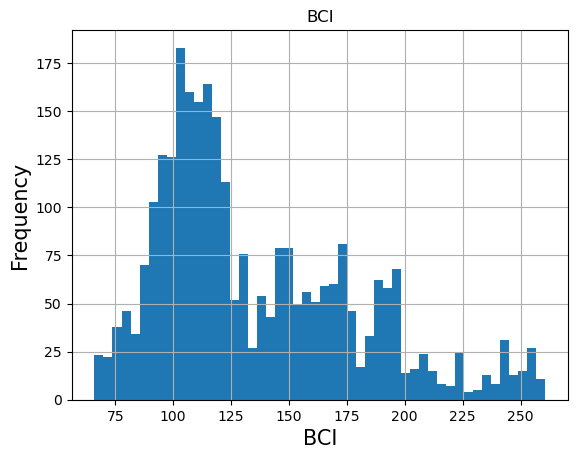

<AxesSubplot:xlabel='Date'>

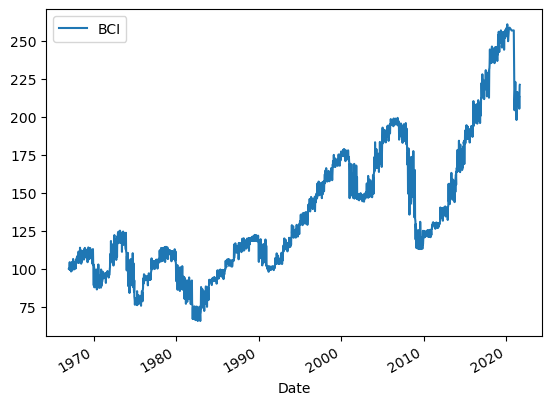

In [4]:
# Histograms of features before logarithmic transformation:
df.hist(column = "BCI", bins = 50)
plt.xlabel("BCI",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCI")



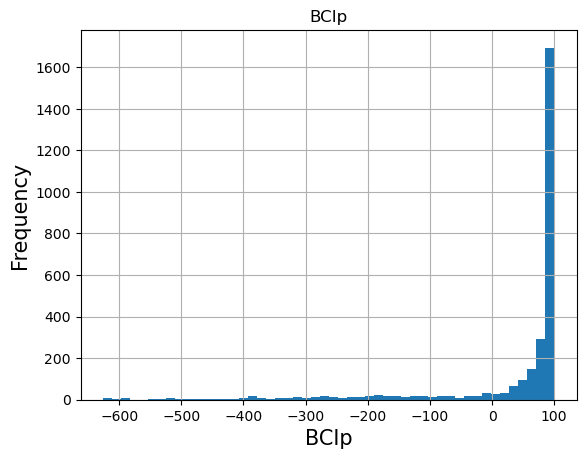

<AxesSubplot:xlabel='Date'>

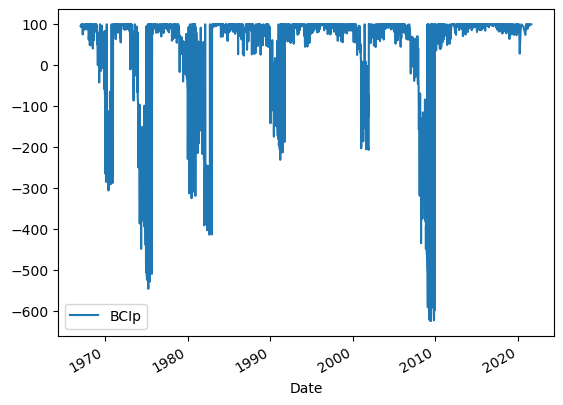

In [5]:
df.hist(column = "BCIp", bins = 50)
plt.xlabel("BCIp",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCIp")



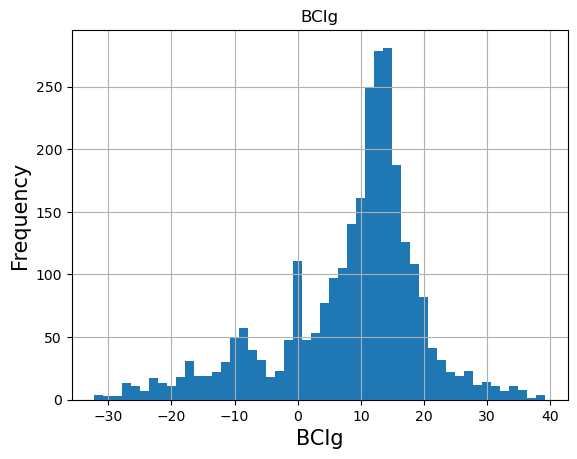

<AxesSubplot:xlabel='Date'>

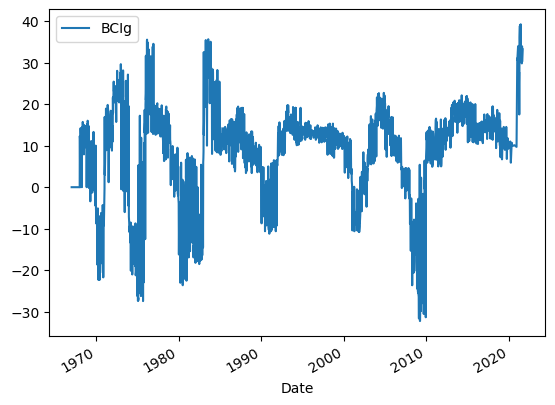

In [6]:
df.hist(column = "BCIg", bins = 50)
plt.xlabel("BCIg",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCIg")



In [7]:
# Log transformations on the data:
df.BCI = df.BCI.apply(lambda x: np.log(x))
df.BCIg = df.BCIg.apply(lambda x: np.log(x + abs(min(df.BCIg)) + 0.1)) # Because there are values that are negative, we transform all values just a little bit positive to be able to make a logarithmic transformation.
df.BCIp = df.BCIp.apply(lambda x: np.log(x + abs(min(df.BCIp)) + 0.1))



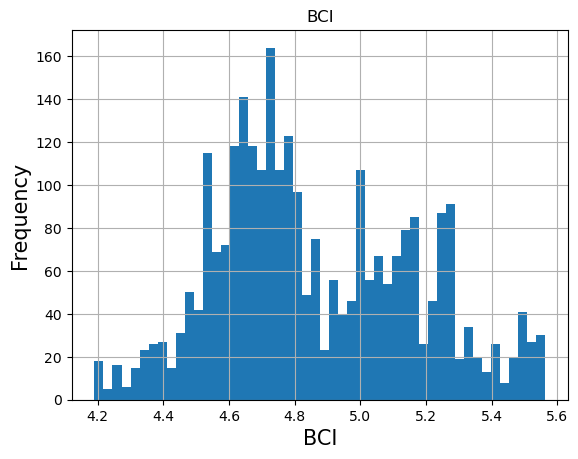

<AxesSubplot:xlabel='Date'>

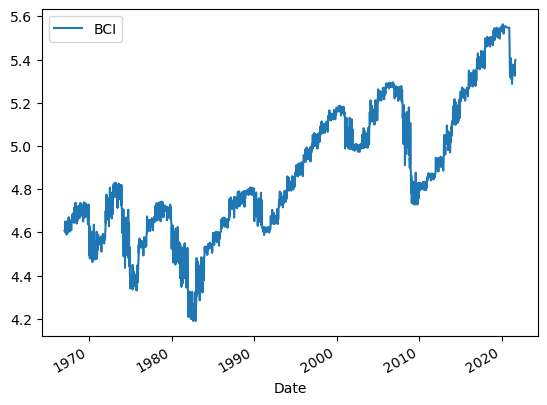

In [8]:
# Histograms of features after logarithmic transformation:
df.hist(column = "BCI", bins = 50)
plt.xlabel("BCI",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCI")



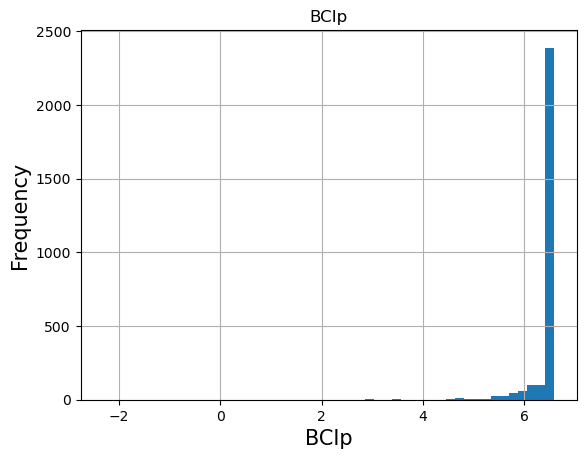

<AxesSubplot:xlabel='Date'>

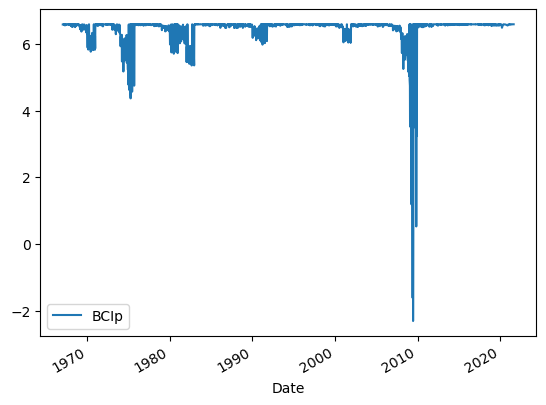

In [9]:
df.hist(column = "BCIp", bins = 50)
plt.xlabel("BCIp",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCIp")



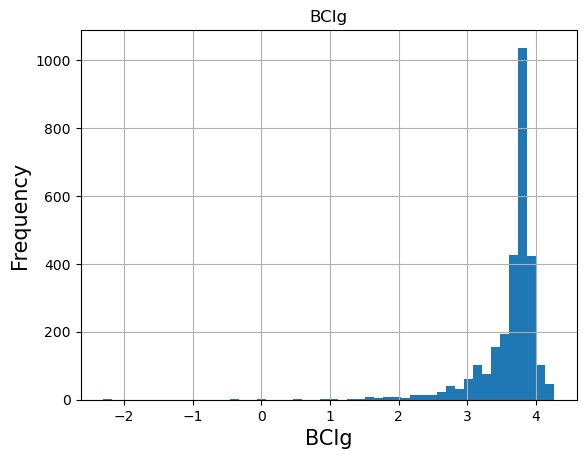

<AxesSubplot:xlabel='Date'>

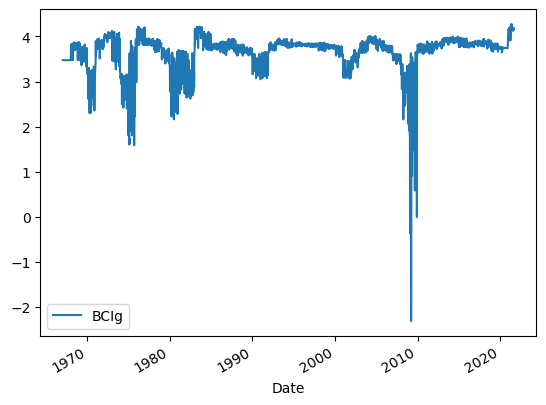

In [11]:
df.hist(column = "BCIg", bins = 50)
plt.xlabel("BCIg",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()
df.plot(y="BCIg")

In [12]:
df.to_csv("BCI_preprocessed.csv")